In [1]:
#Muhammad Fauzan Nur'ilham
#1103204085
#TK-44-G4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ganti path dengan lokasi dataset yang ada
file_path = ('/content/drive/MyDrive/Machine Learning/Dataset/Customers.csv')

# membaca dataset kedalam dataframe
df = pd.read_csv(file_path)

# menampilkan beberapa baris pertama dari dataframe
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
# mengubah nama atribut dalam dataframe
df = df.rename(columns={'Annual Income ($)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# menampilkan seluruh informasi dataframe setelah perubahan
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score     Profession  \
0           1    Male   19          15000              39     Healthcare   
1           2    Male   21          35000              81       Engineer   
2           3  Female   20          86000               6       Engineer   
3           4  Female   23          59000              77         Lawyer   
4           5  Female   31          38000              40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [5]:
# menghapus kolom customer id dan gender dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)

# menampilkan seluruh informasi dataframe setelah penghapusan
print(df.head())

   Age  Annual Income  Spending Score     Profession  Work Experience  \
0   19          15000              39     Healthcare                1   
1   21          35000              81       Engineer                3   
2   20          86000               6       Engineer                1   
3   23          59000              77         Lawyer                0   
4   31          38000              40  Entertainment                2   

   Family Size  
0            4  
1            3  
2            1  
3            2  
4            6  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

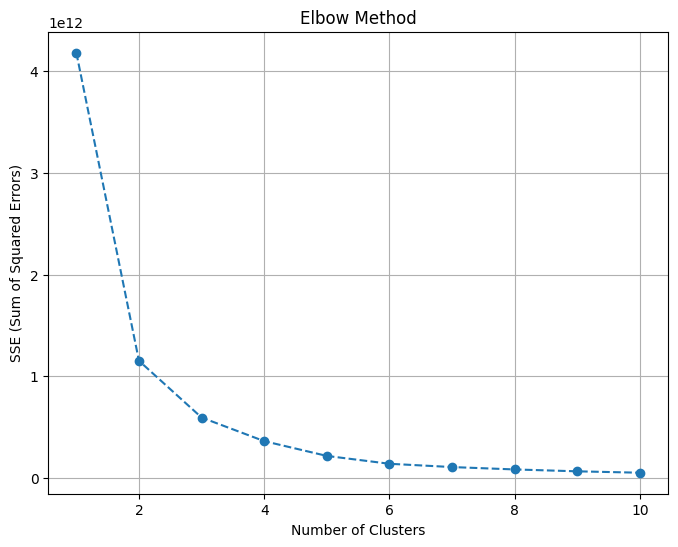

In [6]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi nilai SSE (Sum of Squared Errors)
sse = []

# Range jumlah kluster yang akan diuji
range_clusters = range(1, 11)

# Melakukan analisis elbow method
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


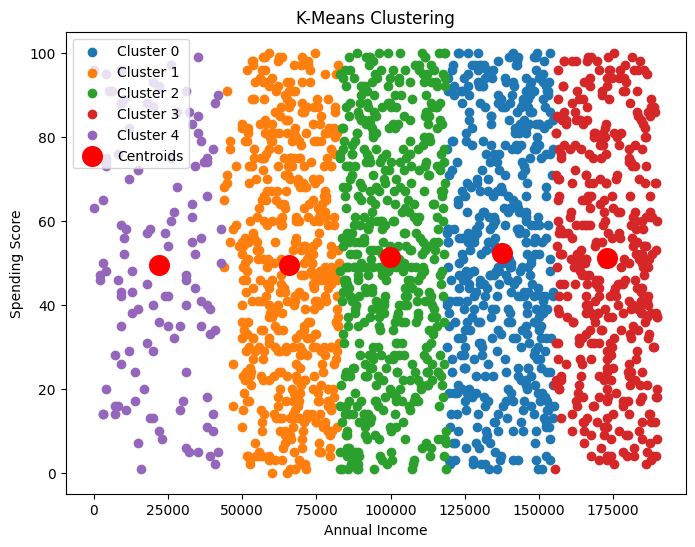

In [7]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan 5 kluster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

# Menambahkan kolom 'label' ke DataFrame 'df' untuk menunjukkan label kluster
df['label'] = kmeans.labels_

# Memvisualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))

# Memisahkan data berdasarkan label kluster
for label in range(5):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [8]:
# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Melakukan analisis Silhouette Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil nilai Silhouette Score
for k, score in zip(range_clusters, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")

# Mencari nilai k terbaik berdasarkan nilai Silhouette Score
best_k = np.argmax(silhouette_scores) + 2  # +2 karena range dimulai dari 2
print(f"The best k is: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6181459943139564
Silhouette Score for k=3: 0.5576209573991037
Silhouette Score for k=4: 0.5328827993106893
Silhouette Score for k=5: 0.5601426626092901
Silhouette Score for k=6: 0.5703609175880092
Silhouette Score for k=7: 0.5476212303210326
Silhouette Score for k=8: 0.5461573907124809
Silhouette Score for k=9: 0.5520125027660381
Silhouette Score for k=10: 0.5541521000360927
The best k is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index Score
davies_bouldin_scores = []

# Melakukan analisis Davies-Bouldin Index Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    davies_bouldin_score_value = davies_bouldin_score(data, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

# Menampilkan hasil nilai Davies-Bouldin Index Score
for k, score in zip(range_clusters, davies_bouldin_scores):
    print(f"Davies-Bouldin Index Score for k={k}: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index Score for k=2: 0.507142669551613
Davies-Bouldin Index Score for k=3: 0.555239077187433
Davies-Bouldin Index Score for k=4: 0.5808377414129318
Davies-Bouldin Index Score for k=5: 0.49914065738049934
Davies-Bouldin Index Score for k=6: 0.48120637098054475
Davies-Bouldin Index Score for k=7: 0.4978076866560893
Davies-Bouldin Index Score for k=8: 0.4943416802113392
Davies-Bouldin Index Score for k=9: 0.4876661563827959
Davies-Bouldin Index Score for k=10: 0.4816869791394504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index Score
calinski_harabasz_scores = []

# Melakukan analisis Calinski-Harabasz Index Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    calinski_harabasz_score_value = calinski_harabasz_score(data, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

# Menampilkan hasil nilai Calinski-Harabasz Index Score
for k, score in zip(range_clusters, calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index Score for k={k}: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index Score for k=2: 5250.203218663513
Calinski-Harabasz Index Score for k=3: 6018.243749033115
Calinski-Harabasz Index Score for k=4: 6999.797991938374
Calinski-Harabasz Index Score for k=5: 9083.062341808205
Calinski-Harabasz Index Score for k=6: 11473.375859893715
Calinski-Harabasz Index Score for k=7: 12513.503727959784
Calinski-Harabasz Index Score for k=8: 13753.92731442955
Calinski-Harabasz Index Score for k=9: 15467.714489095059
Calinski-Harabasz Index Score for k=10: 17389.74323469216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
